# Engenharia de Software para Ciência de Dados - PUC-Rio

### Trabalho Final
**Aluno:** Anrafel Fernandes Pereira - 2211978

> Este trabalho foi preparado procurando seguir as Boas Práticas de Engenharia de Software para a Ciência de Dados.

> A estrutura apresentada nesse trabalho segue o esquema básico de um Projeto de Ciência de Dados.

# 1. User Stories - Entendendo o Problema e Definindo os Objetivos

[US01] Como médico (profissional da saúde) quero realizar a classificação automática de pacientes, para prever se o paciente tem ou não doença cardíaca.

**Descrição:**

* **Tipo de problema de ML:** Classificação

* **Entrada(s):** Medidas específicas de Diagnóstico Médico. São elas:

> 1. **age**: Idade
2. **sex**: Sexo 0 = feminino, 1 = masculino
3. **cp**: Tipo de dor no peito (4 valores)
4. **trestbps**: Pressão sanguínea em repouso
5. **chol**: Colesterol sérico em mg/dl
6. **fbs**: Açúcar no sangue em jejum > 120 mg/dl = 0 | < 120mg/dl = 1
7. **restecg**: Resultados eletrocardiográficos em repouso (valores 0, 1, 2)
8. **thalach**: Frequência cardíaca máxima atingida
9. **exang**: Angina induzida por exercício
10. **oldpeak**: Depressão de ST induzida por exercício em relação ao repouso
11. **slope**: Inclinação do segmento ST de pico do exercício.
12. **ca**: Número de vasos principais coloridos por fluoroscopia (0-3)
13. **thal**: Talassemia: 1 = normal; 2 = problema corrigido; 3 = problema reversível
14. **class**: 0 = não possui doença cardíaca, 1, 2, 3 ou 4 = possui doença cardíaca.

* **Saída(s):** Classificação automática de pacientes que possuem e os que não possuem doença cardíaca.

* **Fontes de dados:** Dataset Heart Disease (https://archive.ics.uci.edu/ml/datasets/heart%2BDisease)

* **Coleta dos dados:** Coletar dados diretamente do Dataset Heart Disease.

* **Dinâmica de criação atualização do modelo:** Conforme atualização do Dataset.

* **Dinâmica de execução do modelo:** Sob demanda

* **Avaliação offline do modelo: ** Preparação e utilização de uma base de testes para validar o modelo em dados não vistos durante o treinamento (hold-out).

* **Monitoramento online do modelo:** Acurácia em tempo real.



O **Dataset Heart Disease** apresenta atributos relacionados a dados médicos. Entre estes atributos está uma variável de resultado, chamada de **Class**. Esse atributo armazena valores do tipo (0, 1, 2, 3 ou 4). O valor 0 indica **ausência de doença cardíaca** e os valores 1, 2, 3 e 4 representam **presença de doença cardíaca**.


## 2. Preparação do Ambiente

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## 3. Etapa de Coleta e Análise de dados

Como primeiro passo foi realizada a preparação do DataSet.

Posteriormente, iniciou-se a análise dos dados em relação a dimensões do datasete e das informações disponibilizadas. Tudo isso foi organizado e apresentado nos códigos a seguir.


In [3]:
# URL de importação do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Cabeçalho das colunas
colunas = ['idade', 'sexo', 'tipo_dor_peito', 'pressao_sanguinea_repouso',
           'colesterol', 'acucar', 'resultados_eletrocardiograficos',
           'freq_cardiaca_max', 'angina', 'depressao_st', 'inclinacao_st',
           'nro_vasos', 'talassemia', 'class']

# Carregamento do arquivo csv de uma URL usando Pandas
dataset = pd.read_csv(url, names=colunas)

In [4]:
# Dimensões do Dataset
print(dataset.shape)

(303, 14)


In [5]:
dataset.head(10)

,idade,sexo,tipo_dor_peito,pressao_sanguinea_repouso,colesterol,acucar,resultados_eletrocardiograficos,freq_cardiaca_max,angina,depressao_st,inclinacao_st,nro_vasos,talassemia,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [6]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   idade                            303 non-null    float64
 1   sexo                             303 non-null    float64
 2   tipo_dor_peito                   303 non-null    float64
 3   pressao_sanguinea_repouso        303 non-null    float64
 4   colesterol                       303 non-null    float64
 5   acucar                           303 non-null    float64
 6   resultados_eletrocardiograficos  303 non-null    float64
 7   freq_cardiaca_max                303 non-null    float64
 8   angina                           303 non-null    float64
 9   depressao_st                     303 non-null    float64
 10  inclinacao_st                    303 non-null    float64
 11  nro_vasos                        303 non-null    object 
 12  talassemia            

A realização desta etapa nos permitiu observar que o Dataset não apresenta valores vazios ou nulos, estando totalmente preenchido.

Entretanto, observou-se que os atributos **talassemia** e **nro_vasos** são do tipo **object**, podendo gerar alguns problemas. Esperava-se atributos do tipo "numérico.


In [7]:
# distribuição das classes
print(dataset.groupby('class').size())

class
0    164
1     55
2     36
3     35
4     13
dtype: int64


Nesta etapa, percebeu-se que a distribuição das **classes** estavam desbalanceadas. Entretanto, esta coluna será transformada para armazenar valores do tipo (0,1,2,3,4), sendo 0 (zero) para ausência de doença cardíaca e (1,2,3 ou 4) para indicar presença de doença cardíaca). Com isso, espera-se que desbalanceamento não exista.

### 3.1. Visualizações dos Dados

Para facilitar a visualização dos dados, foram criados alguns gráficos para que pudessem ser conhecidos os valores de cada um dos atributo do Dataset.

Nesta etapa as visualizações foram dividas em UniModais e MultiModais.

#### 3.1.1 Visualizações Unimodais

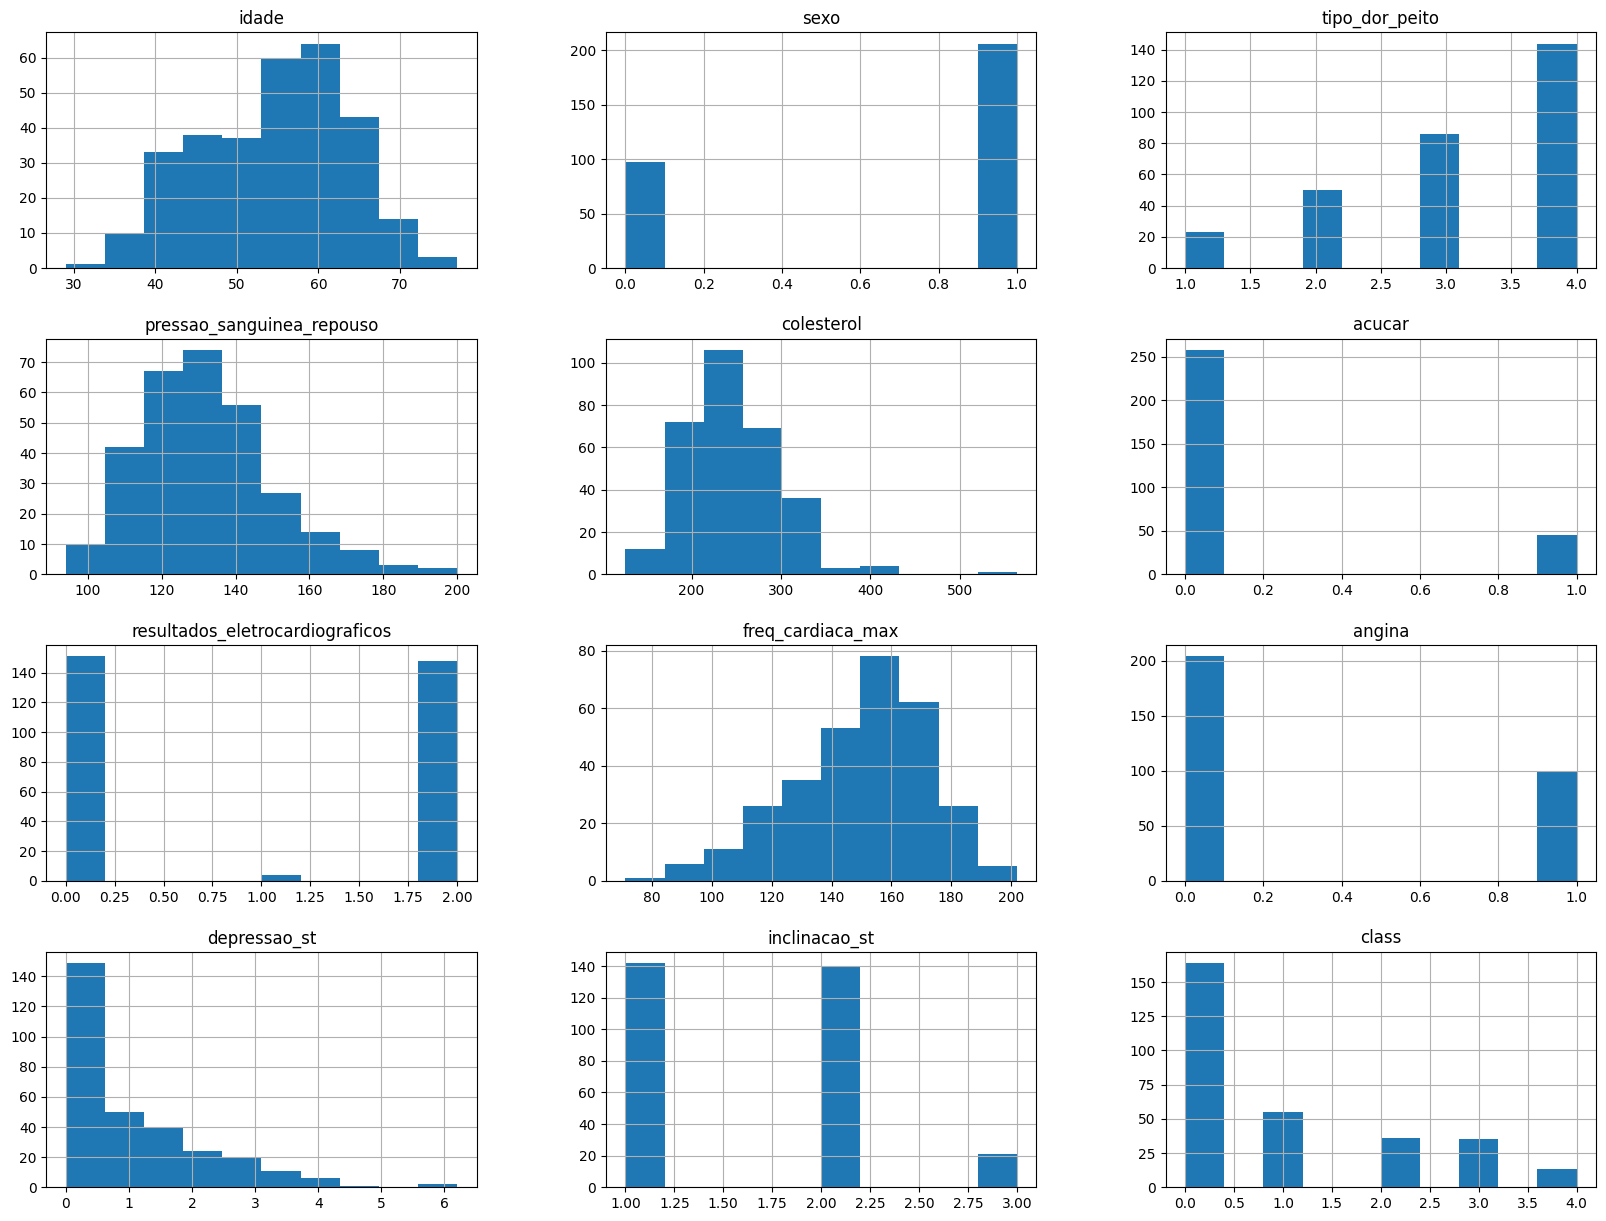

In [8]:
# Histograma
dataset.hist(figsize = (20,15))
plt.show()

In [9]:
dataset.head()

,idade,sexo,tipo_dor_peito,pressao_sanguinea_repouso,colesterol,acucar,resultados_eletrocardiograficos,freq_cardiaca_max,angina,depressao_st,inclinacao_st,nro_vasos,talassemia,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


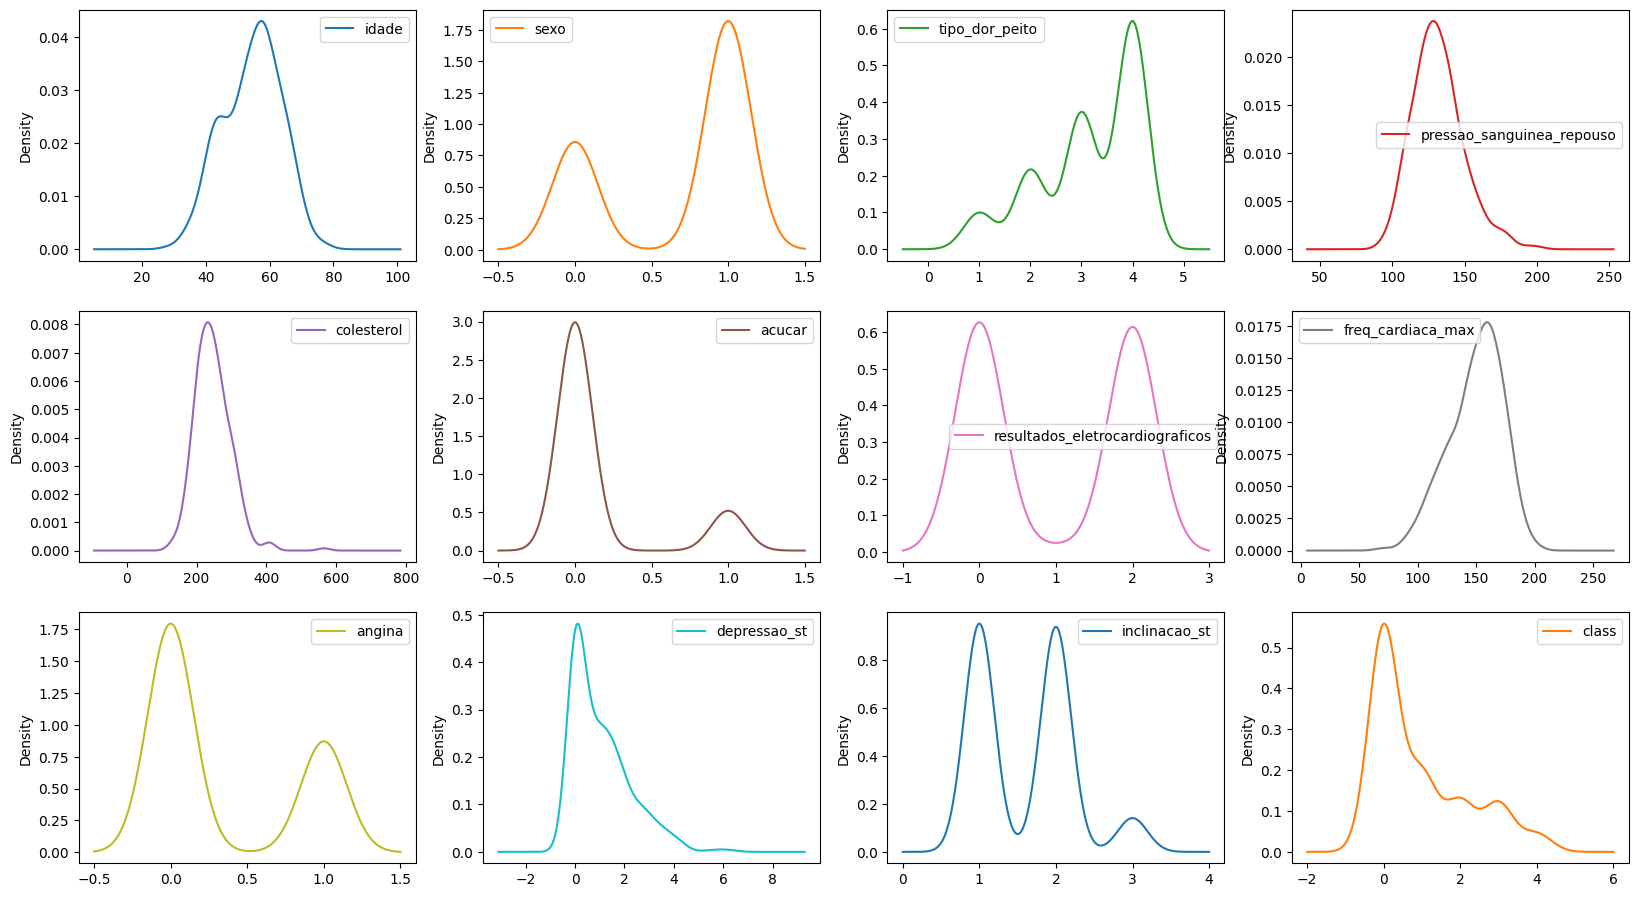

In [10]:
# Gráfico de densidade
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (20,15))
plt.show()

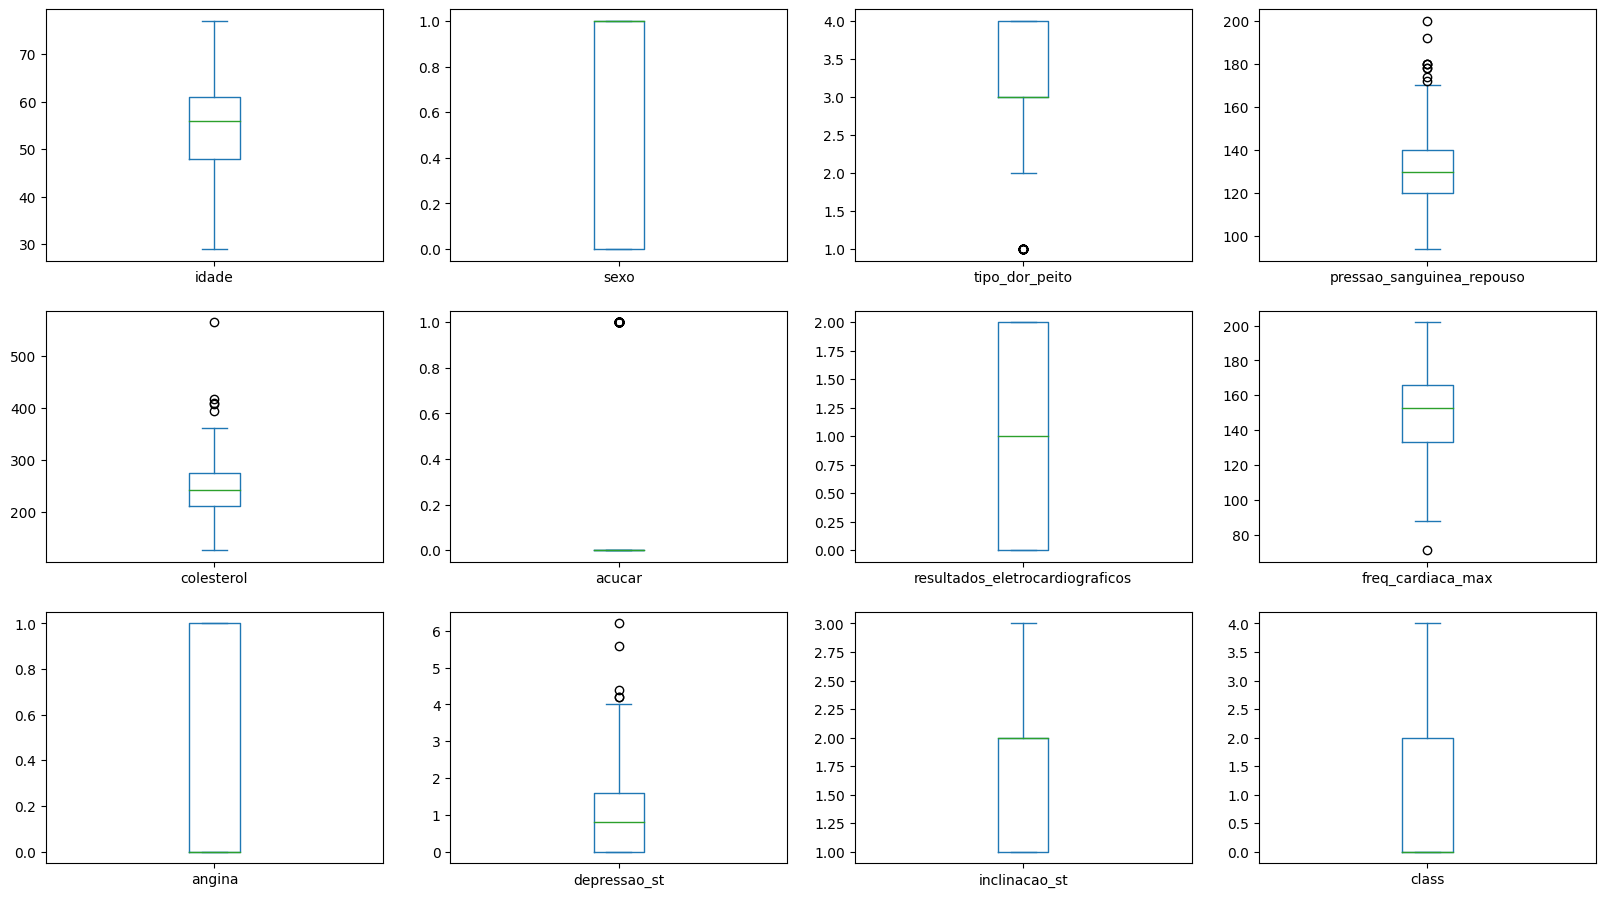

In [11]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (20,15))
plt.show()

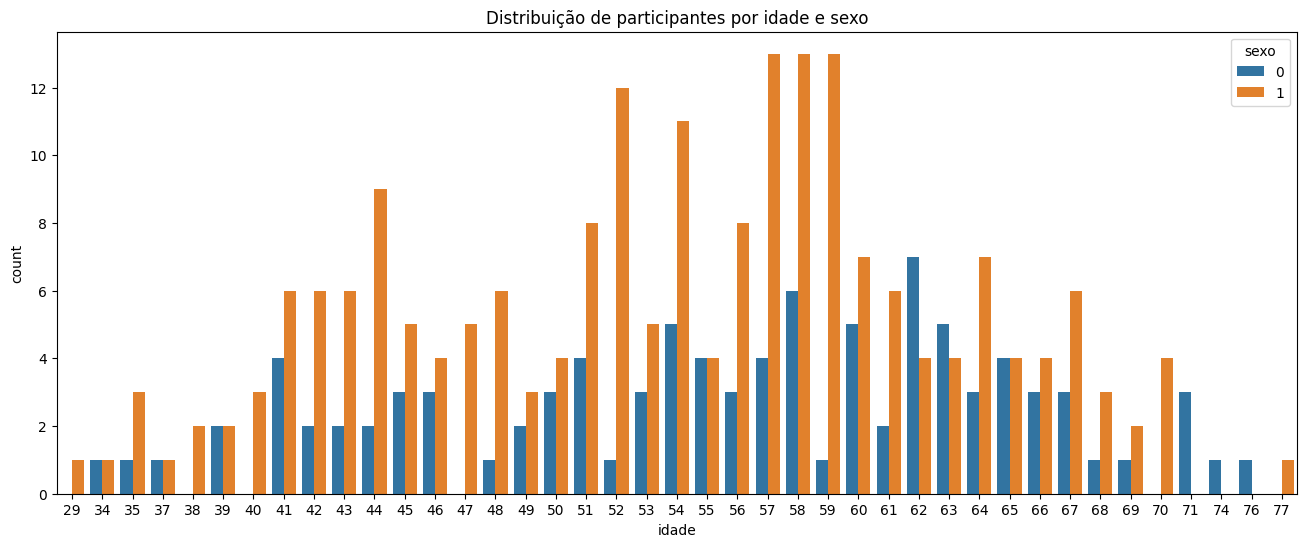

In [12]:
plt.figure(figsize=(16, 6))
dataset = dataset.astype({'idade':'int', 'sexo':'int'})
plt.title('Distribuição de participantes por idade e sexo')
sns.countplot(data=dataset, x='idade', hue='sexo');

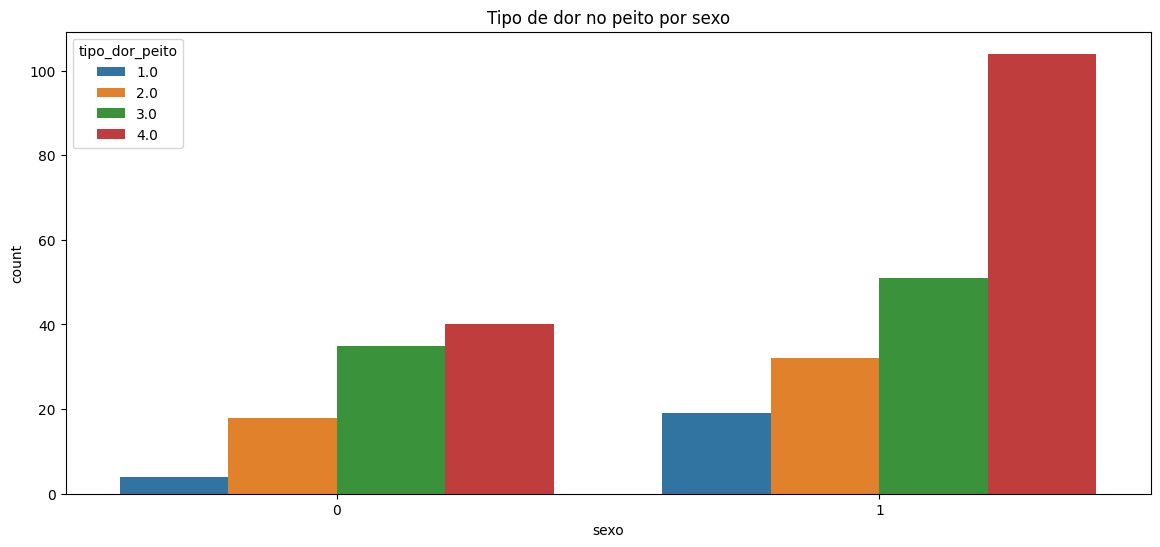

In [13]:
plt.figure(figsize=(14, 6))
plt.title('Tipo de dor no peito por sexo')
sns.countplot(data=dataset, x='sexo',hue='tipo_dor_peito');


#### 3.1.2 Visualizações Multimodais




<ipython-input-14-c3003e943e25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');


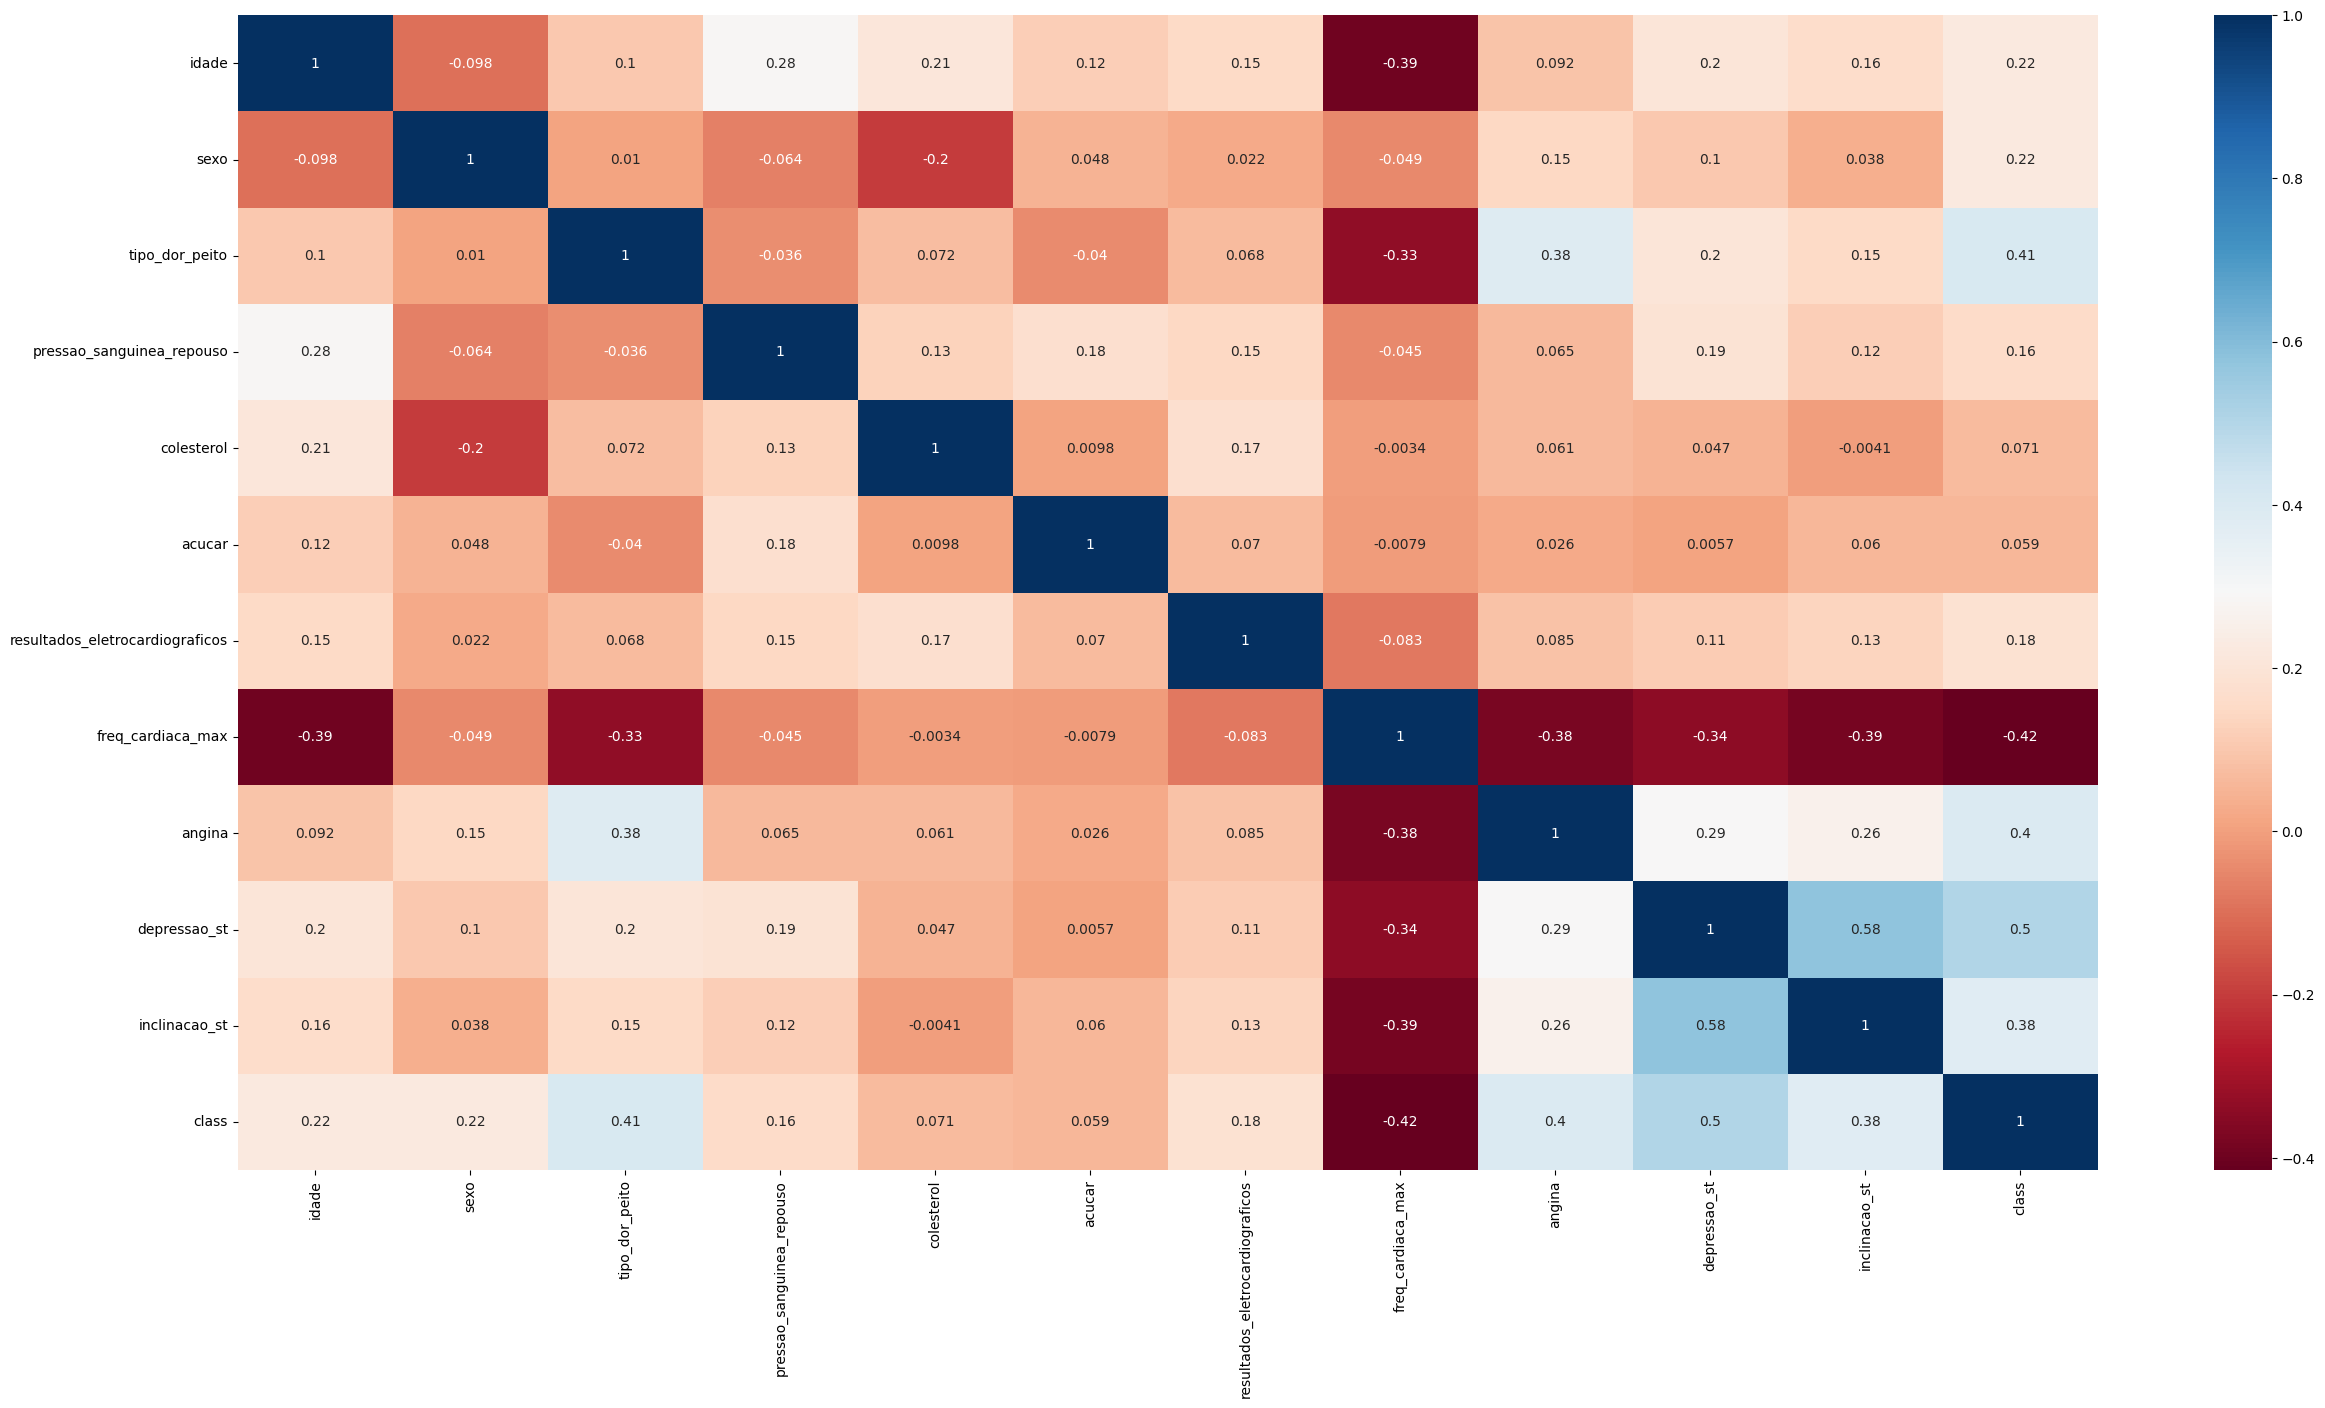

In [14]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (30,15))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Seguindo na etapa de Análise dos Dados, o Seaborn foi utilizado para gerar um gráfico de dispersão para cada par de atributos do dataset.

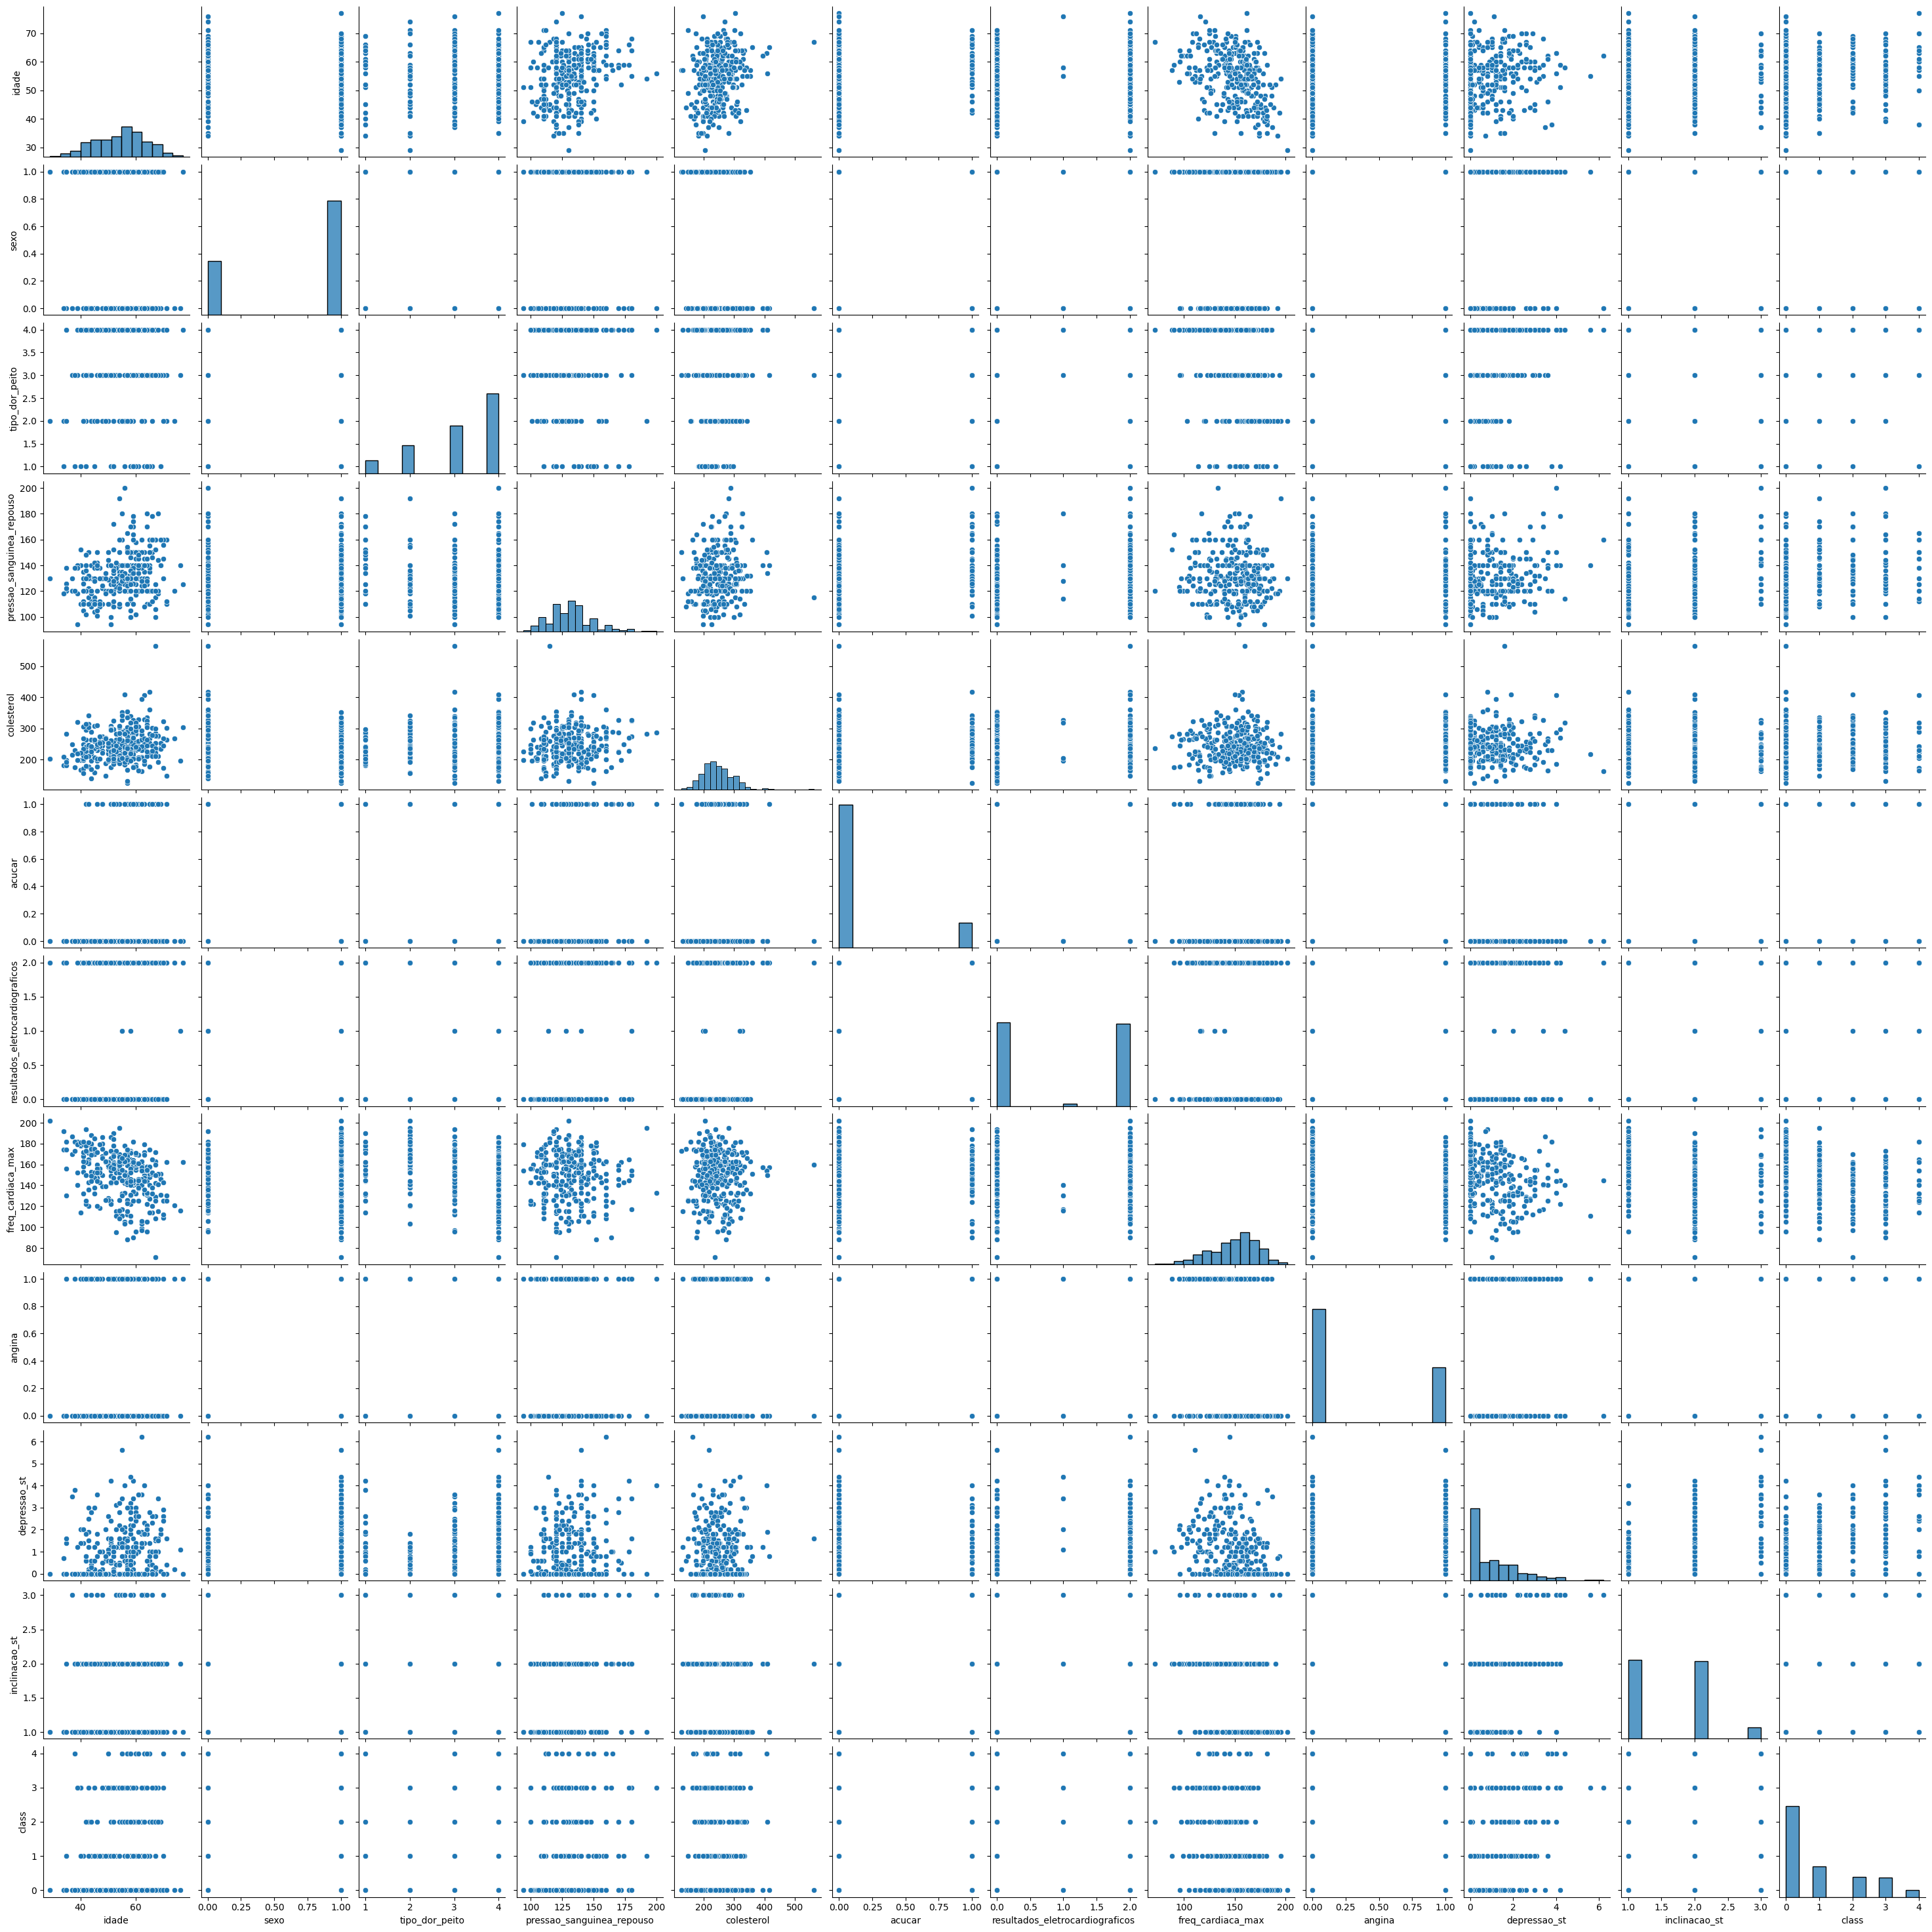

In [15]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset)

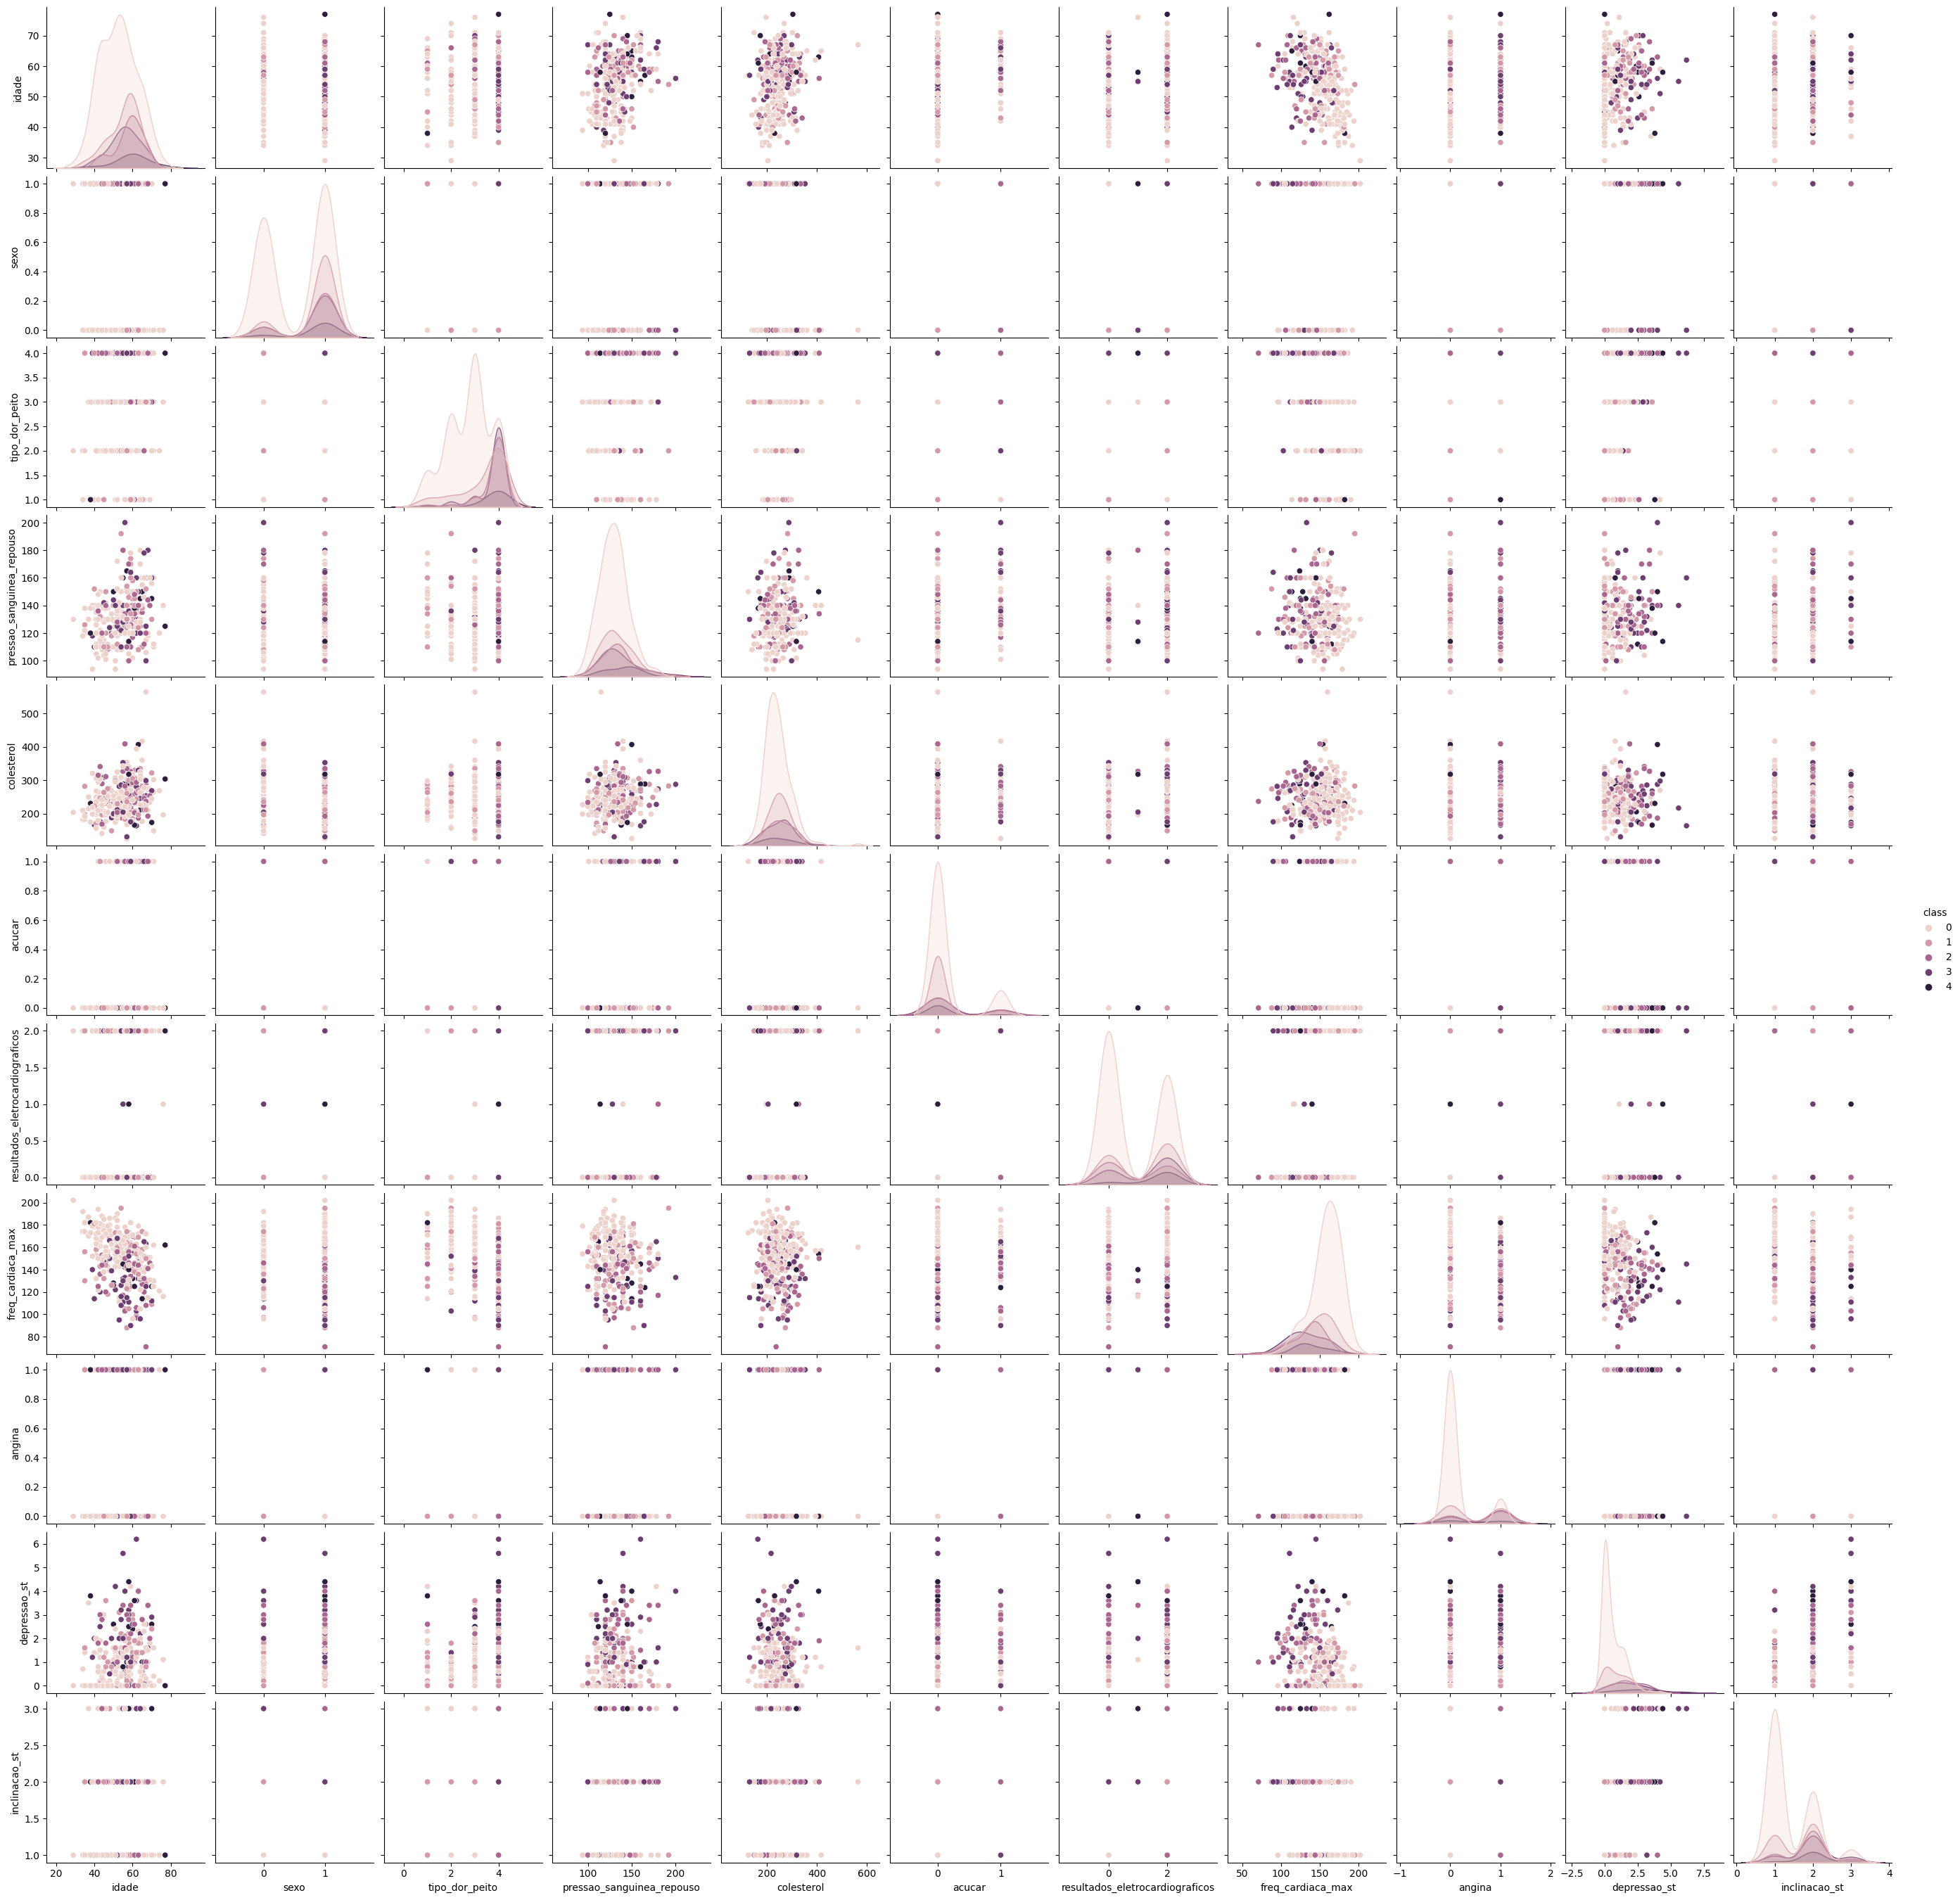

In [16]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(dataset, hue = "class", height = 2.5);

## 4. Etapa de Pré-processamento

As atividades realizadas nessa etapa englobam:


* Eliminação de linhas com dados incorretos nas colunas **nro_vasos** e **talassemia**.
* Conversão / Transformação dos dados das colunas **nro_vasos** e **talassemia** em *float*.
* Criação de uma nova coluna chamada **target** para armazenar informações se o paciente possui ou não possui doença cardiáca.
* Divisão do dataset em dois conjuntos: um primeiro conjunto para **Treino (80%)** e o seguindo conjunto para **Teste (20%)**.




In [ ]:
def has_desease(value):
  if value == 0:
    return 0
  else:
    return 1

# Retira valores não numéricos da coluna talassemia ('?')
dataset = dataset[(dataset.talassemia != '?')]
# Retira valores não numéricos da coluna nro_vasos ('?')
dataset = dataset[(dataset.nro_vasos != '?')]
# Transforma em float as colunas talassemia e nro_vasos
dataset = dataset.astype({'nro_vasos':'float','talassemia':'float'})
# Cria uma coluna nova binária para indicar presença ou não de doença cardíaca
dataset['has_desease'] = dataset['class'].apply(has_desease)
dataset = dataset.drop(['class'], axis=1)

seed = 7
test_size = 0.2

array = dataset.values
X = array[:,0:13].astype(float)
Y = array[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                              test_size=test_size,
                              random_state=seed)

In [ ]:
np.random.seed(7) # definindo uma semente global

## 5. Etapa de Modelagem e Inferência

### 5.1. Criação e Avaliação de modelos: Linha base

Nesta etapa foram utilizados os seguintes modelos de ML:

* Regressão Logística,
* Árvores de classificação (CART),
* Máquinas de vetores de suporte (SVM),
* Naive Bayes (NB)
* K-vizinhos mais próximos (KNN).

Os modelos acima foram utilizados para que pudessemos conhecer a sua performance neste dataset. Para isso, foi utilizada a validação cruzada 10-fold. Os parâmetros de nº de folds e a métrica de avaliação foram configurados.

A partir daí, foi criada uma linha base de desempenho para o problema deste trabalho, baseando-se nos modelos apresentados acima.



In [ ]:
num_folds = 10
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.839855 (0.058147)
KNN: 0.645652 (0.076826)
CART: 0.780254 (0.050133)
NB: 0.843659 (0.075702)
SVM: 0.548913 (0.083992)


Como passo seguinte, cada um dos modelos criados foram treinandos utilizando o conjunto de dados de **Treino**, e ainda, foi utilizada a técnica de validação cruzada. Por fim, apresenta-se a acurácia média e o desvio padrão de cada um dos modelos utilizados.

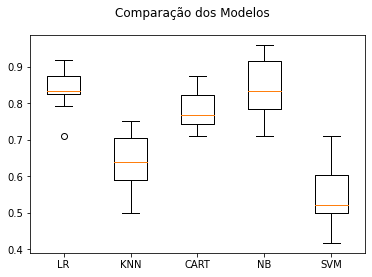

In [ ]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos de ML Utilizados:')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A partir dos resultados foi possível perceber que o Modelo SVM não se mostrou adequado para este dataset, obtendo os piores resultados em termos de acurácia.

### 5.2. Criação e Avaliação de Modelos: Dados Padronizados

As diferentes distribuições dos dados brutos disponíveis no Dataset podem ter gerado um impacto negativo em alguns modelos. Optou-se então por realizar uma cópia do Dataset, padronizando os seus dados e então utilizá-lo. Para isso, os dados foram transformados de modo que cada atributo tenha média 0 e desvio padrão 1.

Além disso, procurando evitar "vazamento de dados" durante a transformação dos dados, utilizou-se *pipelines* que padronizam os dados e constroem o modelo para cada fold de teste de validação cruzada. Com isso, pode-se obter uma estimativa de como cada modelo, utilizando os dados padronizados, funciona.

In [ ]:
# Padronização do Dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.835145 (0.087104)
ScaledKNN: 0.810145 (0.059578)
ScaledCART: 0.788768 (0.068002)
ScaledNB: 0.843659 (0.075702)
ScaledSVM: 0.827355 (0.065238)


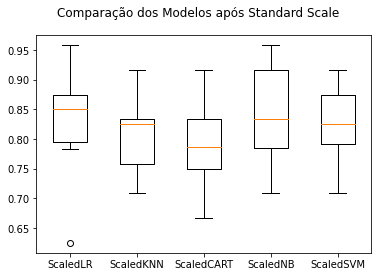

In [ ]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos após Standard Scale')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Normalização do Dataset
pipelines = []
pipelines.append(('SMM_LR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('SMM_KNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('SMM_CART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('SMM_NB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('SMM_SVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SMM_LR: 0.839312 (0.077409)
SMM_KNN: 0.801812 (0.052406)
SMM_CART: 0.788949 (0.053159)
SMM_NB: 0.843659 (0.075702)
SMM_SVM: 0.830616 (0.066642)


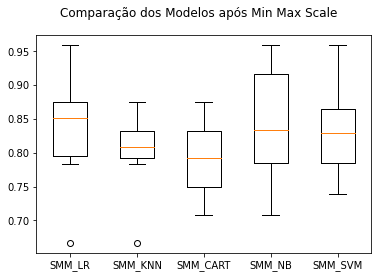

In [ ]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos após Min Max Scale')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Sem tratamento:
* LR: 0.839855 (0.058147)
* KNN: 0.645652 (0.076826)
* CART: 0.780254 (0.050133)
* NB: 0.843659 (0.075702)
* SVM: 0.548913 (0.083992)
-----
Com dados padronizados usando StandardScaler
* ScaledLR: 0.835145 (0.087104)
* ScaledKNN: 0.810145 (0.059578)
* ScaledCART: 0.788768 (0.068002)
* ScaledNB: 0.843659 (0.075702)
* ScaledSVM: 0.827355 (0.065238)
-----
Com dados normalizados usando MinMaxScaler
* ScaledMinMaxLR: 0.839312 (0.077409)
* ScaledMinMaxKNN: 0.801812 (0.052406)
* ScaledMinMaxCART: 0.788949 (0.053159)
* ScaledMinMaxNB: 0.843659 (0.075702)
* ScaledMinMaxSVM: 0.830616 (0.066642)



A partir dos resultados apresentados acima, optou-se por aprofundar o estudo dos modelos SVM e KNN. Acredita-se que outras configurações destes modelos podem gerar resultados ainda mais satisfatórios.


## 6. Etapa de Pós-processamento

#### Ajustes no KNN (K—Nearest Neighbors)

Alguns parâmetros do KNN (K—Nearest Neighbors) foram ajustados, por exemplo, o número de vizinhos e as métricas de distância. Para o número de vizinhos, foram testados todos os valores ímpares de k entre 1 a 21 e, para as métricas de distância, foram utilizadas a Euclidiana, Manhattan e Minkowski.

Utilizando o **pipeline**, cada valor de k e de distância foi avaliado usando a validação cruzada 10-fold. Utilizou-se o conjunto de dados padronizado para isso, uma vez que ele mostrou melhores resultados que o dataset original.

In [ ]:
# Tuning do KNN
kfold = KFold(n_splits=num_folds)

pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

param_grid = {
    'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'knn__metric': ["euclidean", "manhattan", "minkowski"],
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)

grid.fit(X_train, Y_train)

print("Melhor: %f usando %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.856522 usando {'knn__metric': 'euclidean', 'knn__n_neighbors': 21}
0.784964 (0.090891): {'knn__metric': 'euclidean', 'knn__n_neighbors': 1}
0.823188 (0.066282): {'knn__metric': 'euclidean', 'knn__n_neighbors': 3}
0.810145 (0.059578): {'knn__metric': 'euclidean', 'knn__n_neighbors': 5}
0.814493 (0.064850): {'knn__metric': 'euclidean', 'knn__n_neighbors': 7}
0.814312 (0.079752): {'knn__metric': 'euclidean', 'knn__n_neighbors': 9}
0.831159 (0.077501): {'knn__metric': 'euclidean', 'knn__n_neighbors': 11}
0.835326 (0.069223): {'knn__metric': 'euclidean', 'knn__n_neighbors': 13}
0.843841 (0.078028): {'knn__metric': 'euclidean', 'knn__n_neighbors': 15}
0.843841 (0.086471): {'knn__metric': 'euclidean', 'knn__n_neighbors': 17}
0.852355 (0.092392): {'knn__metric': 'euclidean', 'knn__n_neighbors': 19}
0.856522 (0.084529): {'knn__metric': 'euclidean', 'knn__n_neighbors': 21}
0.801993 (0.081944): {'knn__metric': 'manhattan', 'knn__n_neighbors': 1}
0.801993 (0.062003): {'knn__metric': 'man

**Resultados:**

Melhor configuração: Distância **Euclidiana** e **k = 21**

Acurácia: **0.856522**

#### Ajustes no SVM (Support Vector Machine)

Foram ajustados dois dos principais hiperparâmetros do SVM (Support Vector Machine): valor C (o quanto flexibilizar a margem) e o tipo de kernel.

No Scikit-Learn, o padrão para o algoritmo SVM (implementado pela classe SVC) é usar o kernel da Função Base Radial (RBF) e o valor C definido como 1.0.

Foram testados diferentes valores de C e diferentes tipos de kernels. Para isso, utilizou-se a função GridSearchCV.

In [ ]:
kfold = KFold(n_splits=num_folds)

pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'svc__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.852174 usando {'svc__C': 1.5, 'svc__kernel': 'sigmoid'}
0.839493 (0.074594): {'svc__C': 0.1, 'svc__kernel': 'linear'}
0.734420 (0.085814): {'svc__C': 0.1, 'svc__kernel': 'poly'}
0.839674 (0.061718): {'svc__C': 0.1, 'svc__kernel': 'rbf'}
0.848007 (0.065556): {'svc__C': 0.1, 'svc__kernel': 'sigmoid'}
0.843841 (0.085755): {'svc__C': 0.3, 'svc__kernel': 'linear'}
0.827174 (0.084686): {'svc__C': 0.3, 'svc__kernel': 'poly'}
0.830978 (0.075333): {'svc__C': 0.3, 'svc__kernel': 'rbf'}
0.839493 (0.074594): {'svc__C': 0.3, 'svc__kernel': 'sigmoid'}
0.843841 (0.085755): {'svc__C': 0.5, 'svc__kernel': 'linear'}
0.835326 (0.074277): {'svc__C': 0.5, 'svc__kernel': 'poly'}
0.826812 (0.064081): {'svc__C': 0.5, 'svc__kernel': 'rbf'}
0.835326 (0.068776): {'svc__C': 0.5, 'svc__kernel': 'sigmoid'}
0.835326 (0.090907): {'svc__C': 0.7, 'svc__kernel': 'linear'}
0.826993 (0.061195): {'svc__C': 0.7, 'svc__kernel': 'poly'}
0.831159 (0.068179): {'svc__C': 0.7, 'svc__kernel': 'rbf'}
0.843659 (0.075294): 

**Resultados:**

Melhor Configuração: kernel sigmóide e C = 1,5.

Acurácia: 0.852174.


O modelo KNN (K—Nearest Neighbors) alcançou uma acurácia maior **(0.856522)**.

#### Métodos Ensemble (Combinação de Modelos)



Outra maneira de melhorar o desempenho dos algoritmos é usar métodos de Ensemble, que consiste em combinar o resultado de múltiplos modelos em busca de produzir um melhor modelo preditivo.

Nesta estapa, quatro modelos diferentes foram avalidados, sendo dois métodos de Boosting e dois de Bagging:
* Métodos de Boosting: AdaBoost (AB) e Gradient Boosting (GBM).
* Métodos de Bagging: Random Forests (RF) e Extra Trees (ET).

A validação cruzada 10-fold foi novamente utilizada, porém, não houve padronização de dados, uma vez que todos os quatro algoritmos do conjunto acima são baseados em árvores de decisão, que são modelos menos sensíveis às distribuições de dados.

In [ ]:
ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.788587 (0.076294)
GBM: 0.814312 (0.060112)
RF: 0.814493 (0.049693)
ET: 0.826630 (0.081699)


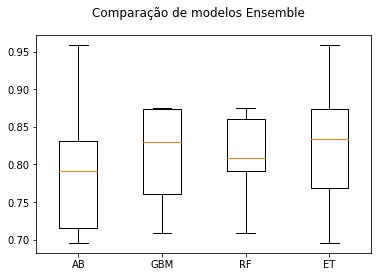

In [ ]:
# Comparação de modelos
fig = plt.figure()
fig.suptitle('Comparação de modelos Ensemble')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com base no gráfico acima, verificou-se que os modelos de Gradient Boosting (GBM) e Extra Trees (ET) obtiviram os melhores desempenhos. Entretanto, comparando com o resultado apresentado pelo KNN (K—Nearest Neighbors), optou-se por utilizá-lo.

In [ ]:
pipelines = []
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.792754 (0.077477)
ScaledGBM: 0.814312 (0.060112)
ScaledRF: 0.826993 (0.063727)
ScaledET: 0.797283 (0.056934)


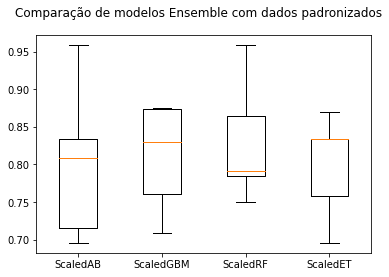

In [ ]:
# Comparação de modelos
fig = plt.figure()
fig.suptitle('Comparação de modelos Ensemble com dados padronizados')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Analisando os dois últimos gráficos, percebeu-se que não há diferença significativa ao se utilizar os dados de forma padronizada, com o StandardScale.

## 7. Etapa de Apresentação de Resultados

O KNN (K—Nearest Neighbors) foi o modelo que obteve a maior acurácia, utilizando a métrica euclidiana e k=21.

O modelo foi treinado utilizando todo o Dataset de **Treino** (sem validação cruzada), e depois foram feitas as predições para o Dataset de **Teste**. Os dados de entrada foram padronizados.

In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
model.fit(rescaledX, Y_train)

# Estimativa da Acurácia no Dataset de Teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8
[[28  4]
 [ 8 20]]
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        32
         1.0       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



Como resultado, observou-se uma acurácia de 80% em dados "Não Vistos" (Dataset de **Teste**). O resultado foi dentro do esperado, visto que os resultados mais promissores obtidos com a utilização dos modelos KNN e SVM, ficaram em torno de 85% de acurácia.

Acredita-se que resultados semelhantes possam ser obtidos com a implantação do modelo em produção.

Por fim, o modelo foi treinado com todo o dataset, incluindo o conjunto de dados de Treino e Teste.

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
model.fit(rescaledX, Y)

ExtraTreesClassifier(n_estimators=10)

## 8. Etapa de Implantação do Modelo e Geração de Valor

Para esta etapa foram selecionados novos dados (ainda não utilizados), para que o Modelo possa realizar uma predição da classe de saída.


In [ ]:
# Novos dados
data = {'idade': [65, 70, 78],
        'sexo': [1, 0, 1],
        'tipo_dor_peito': [4, 3, 2],
        'pressao_sanguinea_repouso': [145, 120, 130],
        'colesterol': [233, 254, 354],
        'acucar': [0, 0, 1],
        'resultados_eletrocardiograficos': [2, 0, 2],
        'freq_cardiaca_max': [160, 170, 172],
        'angina': [0, 0, 0],
        'depressao_st': [0.8, 1.2, 0.9],
        'inclinacao_st': [3, 3, 2],
        'nro_vasos': [2, 0, 1],
        'talassemia': [3, 7, 6],
        }

atributos = ['idade', 'sexo', 'tipo_dor_peito', 'pressao_sanguinea_repouso',
           'colesterol', 'acucar', 'resultados_eletrocardiograficos',
           'freq_cardiaca_max', 'angina', 'depressao_st', 'inclinacao_st',
           'nro_vasos', 'talassemia']

entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)
print(X_entrada)

[[ 65.    1.    4.  145.  233.    0.    2.  160.    0.    0.8   3.    2.
    3. ]
 [ 70.    0.    3.  120.  254.    0.    0.  170.    0.    1.2   3.    0.
    7. ]
 [ 78.    1.    2.  130.  354.    1.    2.  172.    0.    0.9   2.    1.
    6. ]]


Antes da submetê-los ao modelo, os dados foram padronizados.

In [ ]:
# Padronização nos dados de entrada
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.15755458  0.69109474  0.87388018  0.75038004 -0.27644339 -0.41145029
   1.01019851  0.45412022 -0.69641941 -0.21951966  2.26414539  1.41162482
  -0.89422007]
 [ 1.7109894  -1.44697961 -0.16428947 -0.65943064  0.12810317 -0.41145029
  -1.00341866  0.89074601 -0.69641941  0.12407633  2.26414539 -0.72197605
   1.17257652]
 [ 2.5964851   0.69109474 -1.20245913 -0.09550637  2.05451535  2.43042728
   1.01019851  0.97807117 -0.69641941 -0.13362066  0.6437811   0.34482438
   0.65587737]]


In [ ]:
# Estimativa de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 1.]


# 9. Disponibilização para o Usuário Final

Como oportunidade de implantar o modelo para disponibilizá-lo para o usuário final, neste caso, o médico (profissional da saúde), optou-se por utlizar as seguintes tecnologias:

* **Aplicação:** desenvolver uma Aplicação Web, utilizando o Flask, de maneira que o usuário tenha acesso facilitado a ferramenta de qualquer dipositivo e em qualquer lugar.

* **Data apps:** Para que os resultados possam ser entregue de maneira facilitada para o usuário, optou-se por utilizar a Streamlit, construindo um dashboard interativo, apresentando os dados rapidamente e de maneira bem amigável para o profissional da saúde (usuário da aplicação).

* **Serverless:** Para o Serverless, optou-se pela AWS Lambda, o que facilita a alocação de recursos sob demanda dos usuários da aplicação.

* **Cloud:** A proposta é que a aplicação possa ser hospedada em um serviço de nuvem. E por se tratar de uma aplicação de ML - Machine Learning, optou-se pelo serviço oferecido pela Amazon SageMaker, visto que a ferramenta possibilita que os desenvolvedores criem, treinem e implantem modelos de aprendizado de máquina mais facilmente na nuvem.


# 10. Informações Finais

**Trabalho Final da Disciplina de Engenharia de Software para Ciência de Dados - PUC-Rio**

**Aluno:** Anrafel Fernandes Pereira
**Matrícula:** 2211978
